In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [103]:
data = pd.read_csv("../knn/test", names=["gender", "height", "weight"])

In [104]:
data

gender     height      weight
1340    Male  61.310798  150.316449
2041    Male  71.035595  214.475994
2431    Male  66.798977  173.208632
4671    Male  69.768653  199.672843
8719  Female  60.333372  102.256838
...      ...        ...         ...
7265  Female  62.594759  145.987787
4393    Male  69.944080  196.178101
8868  Female  65.017087  137.568797
2178    Male  66.782187  176.611993
3109    Male  69.861439  183.813798

[1999 rows x 3 columns]

In [105]:
x = data['height']

In [106]:
y = data['weight']

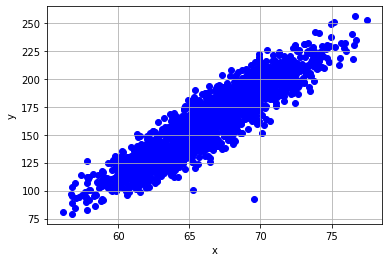

In [107]:
%matplotlib inline 
plt.scatter(x, y, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

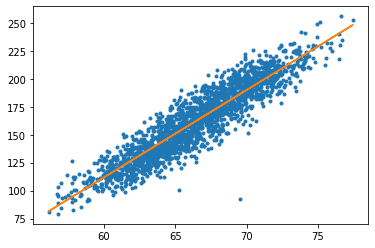

In [108]:
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [131]:
# using a smaller data set
small_data = data.head(30)

In [110]:
x_s = small_data['height']
y_s = small_data['weight']

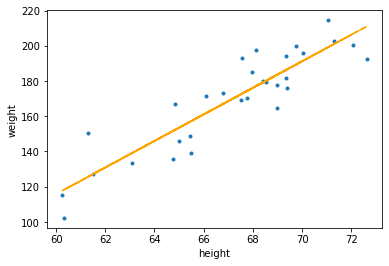

In [111]:
b, m = polyfit(x_s, y_s, 1)
plt.plot(x_s, y_s, '.')
plt.plot(x_s, b + m * x_s, '--', color='orange')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [132]:
b

-336.502911107009

In [113]:
m

7.53837949297353

In [114]:
# getting b and m without library
mean_y = (sum(small_data['weight'])/len(small_data['weight']))

In [115]:
mean_x =  (sum(small_data['height'])/len(small_data['height']))

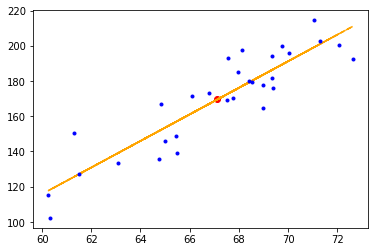

In [116]:
plt.plot(mean_x, mean_y, '.', color='r', marker='o')
plt.plot(x_s, b + m * x_s, '--', color='orange')
plt.plot(x_s, y_s, '.', color='blue')

In [118]:
# Get m
top = 0
bottom = 0
for index, row in small_data.iterrows():
    current_x = row['height']
    current_y = row['weight']
    top += ((current_x-mean_y)*(current_y-mean_y))
    bottom += (current_x - mean_x) ** 2

In [119]:
small_data_m = top/bottom

In [133]:
small_data_m # no library m

7.538379492973638

In [121]:
m #library m

7.53837949297353

In [123]:
b # library b

-336.502911107009

In [128]:
new_b = mean_y-(m*mean_x)

In [129]:
new_b # no library b

-336.5029111070089

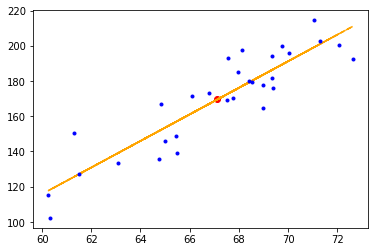

In [136]:
plt.plot(mean_x, mean_y, '.', color='r', marker='o')
plt.plot(x_s, new_b + small_data_m * x_s, '--', color='orange')
plt.plot(x_s, y_s, '.', color='blue')

In [140]:
error_list = []
for index, row in small_data.iterrows():
    current_x = row['height']
    y = (small_data_m*(current_x)+new_b)
    error_list.append(y)

In [141]:
error_list

[125.681154488336,
 198.99036467999485,
 167.05312373163048,
 189.4396707466933,
 118.3129460224468,
 156.9533486997911,
 179.29688848259423,
 172.466144032052,
 161.6082973662086,
 151.70038120551447,
 183.4091688218091,
 117.74307452297688,
 211.00297801507293,
 180.1699180264045,
 127.2627826291889,
 183.50746376627296,
 153.507826231254,
 206.63650116617453,
 186.2058154908001,
 201.04273971894895,
 175.9059994240348,
 186.43990133867555,
 177.20464084391392,
 174.36774650800993,
 191.4134893366637,
 138.9245527806478,
 186.3087323026939,
 172.78359320456218,
 157.13736284639305,
 152.14367793525906]

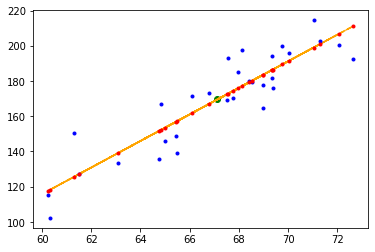

In [145]:
plt.plot(mean_x, mean_y, '.', color='g', marker='o')
plt.plot(x_s, new_b + small_data_m * x_s, '--', color='orange')
plt.plot(x_s, y_s, '.', color='blue')
plt.plot(x_s, error_list, '.', color='r')

In [146]:
# top_r = 0
# bottom_y = 0 
# for index, row in small_data.iterrows():
#     i = row
#     error

In [147]:
small_data['predicted'] = error_list

/Users/GaelGil/Desktop/GitRepos/algorithms/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
small_data

gender     height      weight   predicted
1340    Male  61.310798  150.316449  125.681154
2041    Male  71.035595  214.475994  198.990365
2431    Male  66.798977  173.208632  167.053124
4671    Male  69.768653  199.672843  189.439671
8719  Female  60.333372  102.256838  118.312946
9514  Female  65.459196  148.636723  156.953349
2448    Male  68.423167  180.257980  179.296888
5715  Female  67.517038  169.308893  172.466144
1268    Male  66.076696  171.292975  161.608297
6601  Female  64.762366  135.780229  151.700381
1532    Male  68.968680  177.809028  183.409169
7088  Female  60.257776  115.389786  117.743075
2707    Male  72.629123  192.328967  211.002978
2705    Male  68.538978  179.571466  180.169918
5178  Female  61.520609  127.390661  127.262783
3815    Male  68.981719  164.721307  183.507464
8866  Female  65.002132  146.027850  153.507826
271     Male  72.049890  200.202829  206.636501
2747    Male  69.339667  181.904824  186.205815
3841    Male  71.307852  202.485157  201.042740
1926    Male  67.973350  185.025057  175.905999
4756    Male  69.370720  175.937148  186.439901
3403    Male  68.145621  197.476930  177.204641
2022    Male  67.769294  170.296763  174.367747
4534    Male  70.030489  196.018337  191.413489
8343  Female  63.067595  133.659394  138.924553
3129    Male  69.353320  194.450557  186.308732
3212    Male  67.559149  192.957731  172.783593
9558  Female  65.483606  138.982098  157.137363
2229    Male  64.821171  166.776838  152.143678

In [152]:
top_r = 0
bottom_r = 0 
for index, row in small_data.iterrows():
    y_predict = row['predicted']
    y_val = row['weight']
    top_r += (y_predict-mean_y)
    bottom_r += (y_val-mean_y) ** 2

In [153]:
r_2 = top_r/bottom_r

In [154]:
r_2

9.463059236755918e-15